#Jamboree Admission Probability Factor Mini Project
Jamboree has helped thousands of students to make it to top colleges abroad. Using GMAT, GRE or SAT scores, their unique problem-solving methods ensure maximum scores with minimum effort.
They want to analyse the probability of getting into the IVY league college based on the following factors.

Following are the attributes of the dataset.


1.   S.No.
2.   GRE Score: GRE score out of 340.
3. TOEFL Score: TOEFL score out of 120.
4. University Rating
5. SOP: Statement of Purpose out of 5
6. LOR: Letter of Recommendation out of 5
7. CGPA: GPA out of 10
8. Research: If students have taken part in research.
9. Chance of Admission: How eligible is a student for admission.




#Problem Statement:

Chances of getting admission into IVY league college based on muliple factors such as entrance test scores, GPA, etc.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df=pd.read_csv("jamboree_admission.csv")
df=df.drop('Serial No.',axis=1)
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


((500, 8), None)

In [ ]:
print(df["GRE Score"].value_counts(),df["TOEFL Score"].value_counts(),df["University Rating"].value_counts(),df["SOP"].value_counts(),df["LOR "].value_counts(),df["CGPA"].value_counts(),df["Research"].value_counts(),df["Chance of Admit "].value_counts())

GRE Score
312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: count, dtype: int64 TOEFL Score
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: count, dtype: int64 University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64 SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0

In [ ]:
print(df["GRE Score"].nunique(),df["TOEFL Score"].nunique(),df["University Rating"].nunique(),df["SOP"].nunique(),df["LOR "].nunique(),df["CGPA"].nunique(),df["Research"].nunique(),df["Chance of Admit "].nunique())

49 29 5 9 9 184 2 61


In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#COMMENT ON THE RANGE OF ATTRIBUTES
1. There are 500 rows and 9 columns.
2. Column names are 'Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit'.
3. 'Serial No.','GRE Score','TOEFL Score','University Rating','Research' are all integers.
4. 'SOP','LOR','CGPA','Chance of Admit' are all floating numbers.
5. Statistics of the Chance to Admit columns:
    - Mean               :   0.72174
    - Standard deviation :   0.14114
    - Minimum value      :   0.34
    - Maximum value      :   0.97
6. There are 500 unique entries for checking for admission stats.
7. There are only two values for research: 0 or 1, where 0 means research not done and 1 means research completed.
8. Maximum chances of getting into IVY League college is 0.97 while minimum is 0.34.

#UNIVARIATE AND BIVARIATE ANALYSIS
For continous variables : DISTPLOT,COUNTPLOT,HISTOGRAM for univariate analysis

<Axes: xlabel='CGPA', ylabel='Count'>

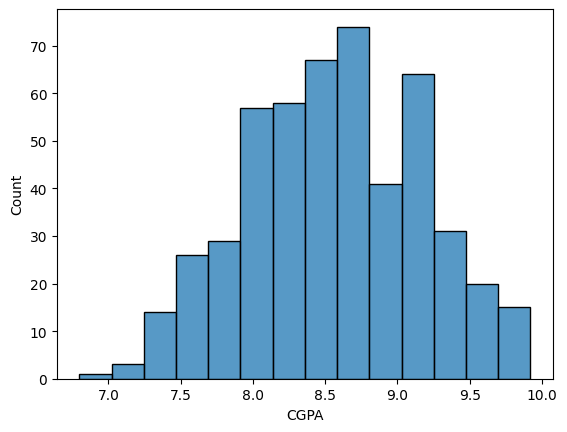

In [ ]:
sns.histplot(df["CGPA"])

<Axes: xlabel='GRE Score', ylabel='Count'>

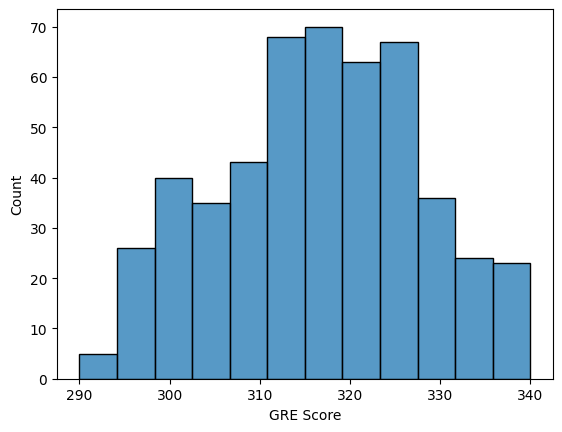

In [ ]:
sns.histplot(df["GRE Score"])

<Axes: xlabel='Research', ylabel='count'>

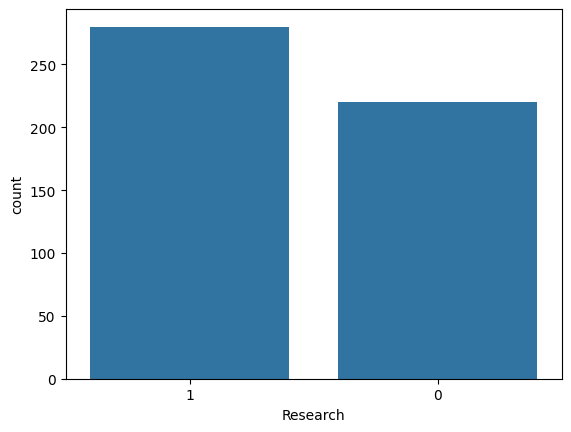

In [ ]:
sns.countplot(data = df,x = "Research",order = df["Research"].value_counts().index)

<Axes: xlabel='SOP', ylabel='count'>

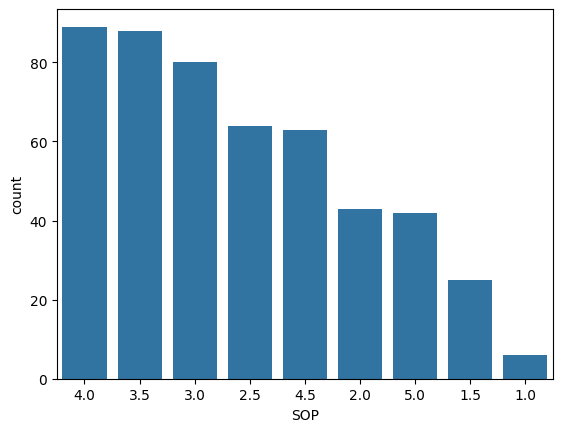

In [ ]:
sns.countplot(data = df,x = "SOP",order = df["SOP"].value_counts().index)

<Axes: xlabel='University Rating', ylabel='count'>

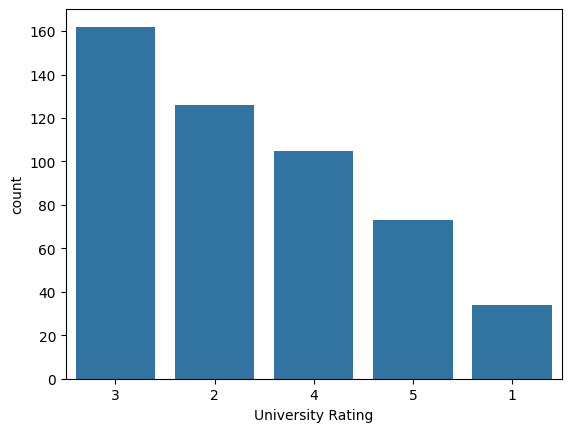

In [ ]:
sns.countplot(data = df,x = "University Rating",order = df["University Rating"].value_counts().index)

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

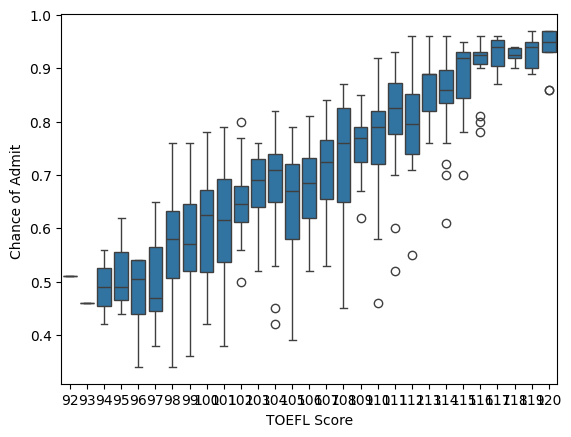

In [ ]:
sns.boxplot(data = df,x = "TOEFL Score", y = "Chance of Admit ")

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

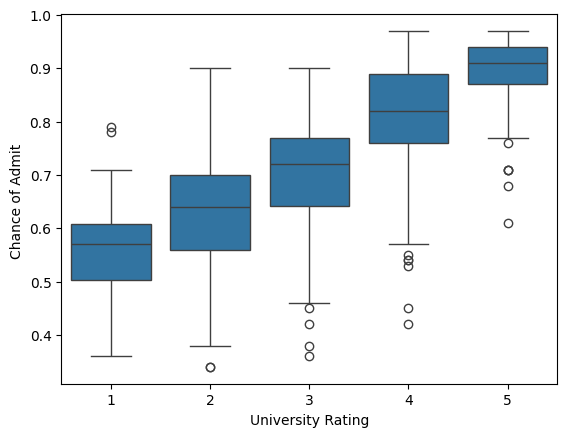

In [ ]:
sns.boxplot(data = df,x = "University Rating", y = "Chance of Admit ")

<Axes: xlabel='LOR ', ylabel='Chance of Admit '>

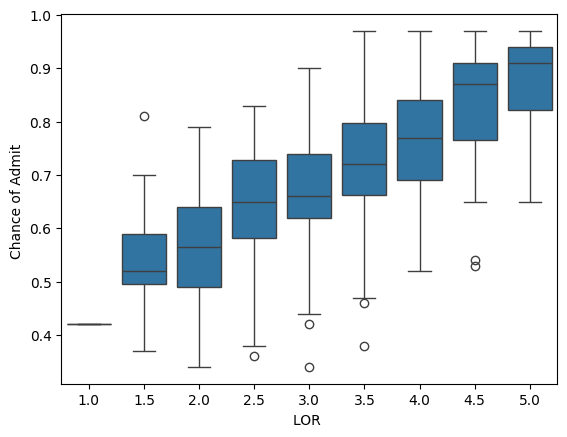

In [ ]:
sns.boxplot(data = df,x = "LOR ", y = "Chance of Admit ")

In [ ]:
pd.crosstab(df["Chance of Admit "],df["CGPA"])

CGPA,6.80,7.20,7.21,7.23,7.25,7.28,7.30,7.34,7.36,7.40,...,9.70,9.74,9.76,9.78,9.80,9.82,9.86,9.87,9.91,9.92
Chance of Admit,,,,,,,,,,,,,,,,,,,,,
0.34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.36,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0.95,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

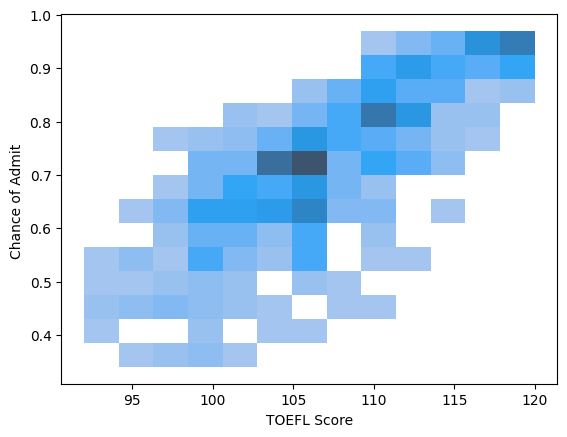

In [ ]:
sns.histplot(x = df["TOEFL Score"], y = df["Chance of Admit "])

<Axes: xlabel='SOP', ylabel='Chance of Admit '>

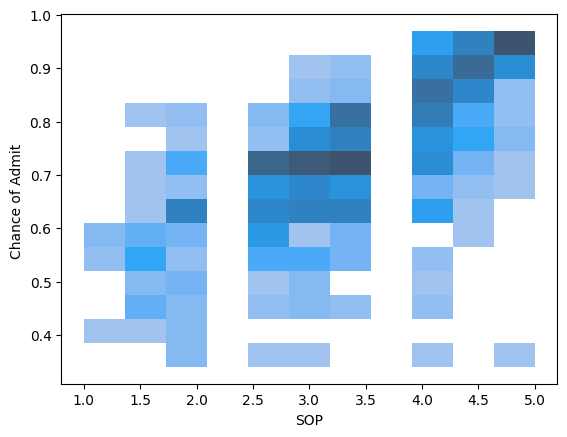

In [ ]:
sns.histplot(x = df["SOP"], y = df["Chance of Admit "])

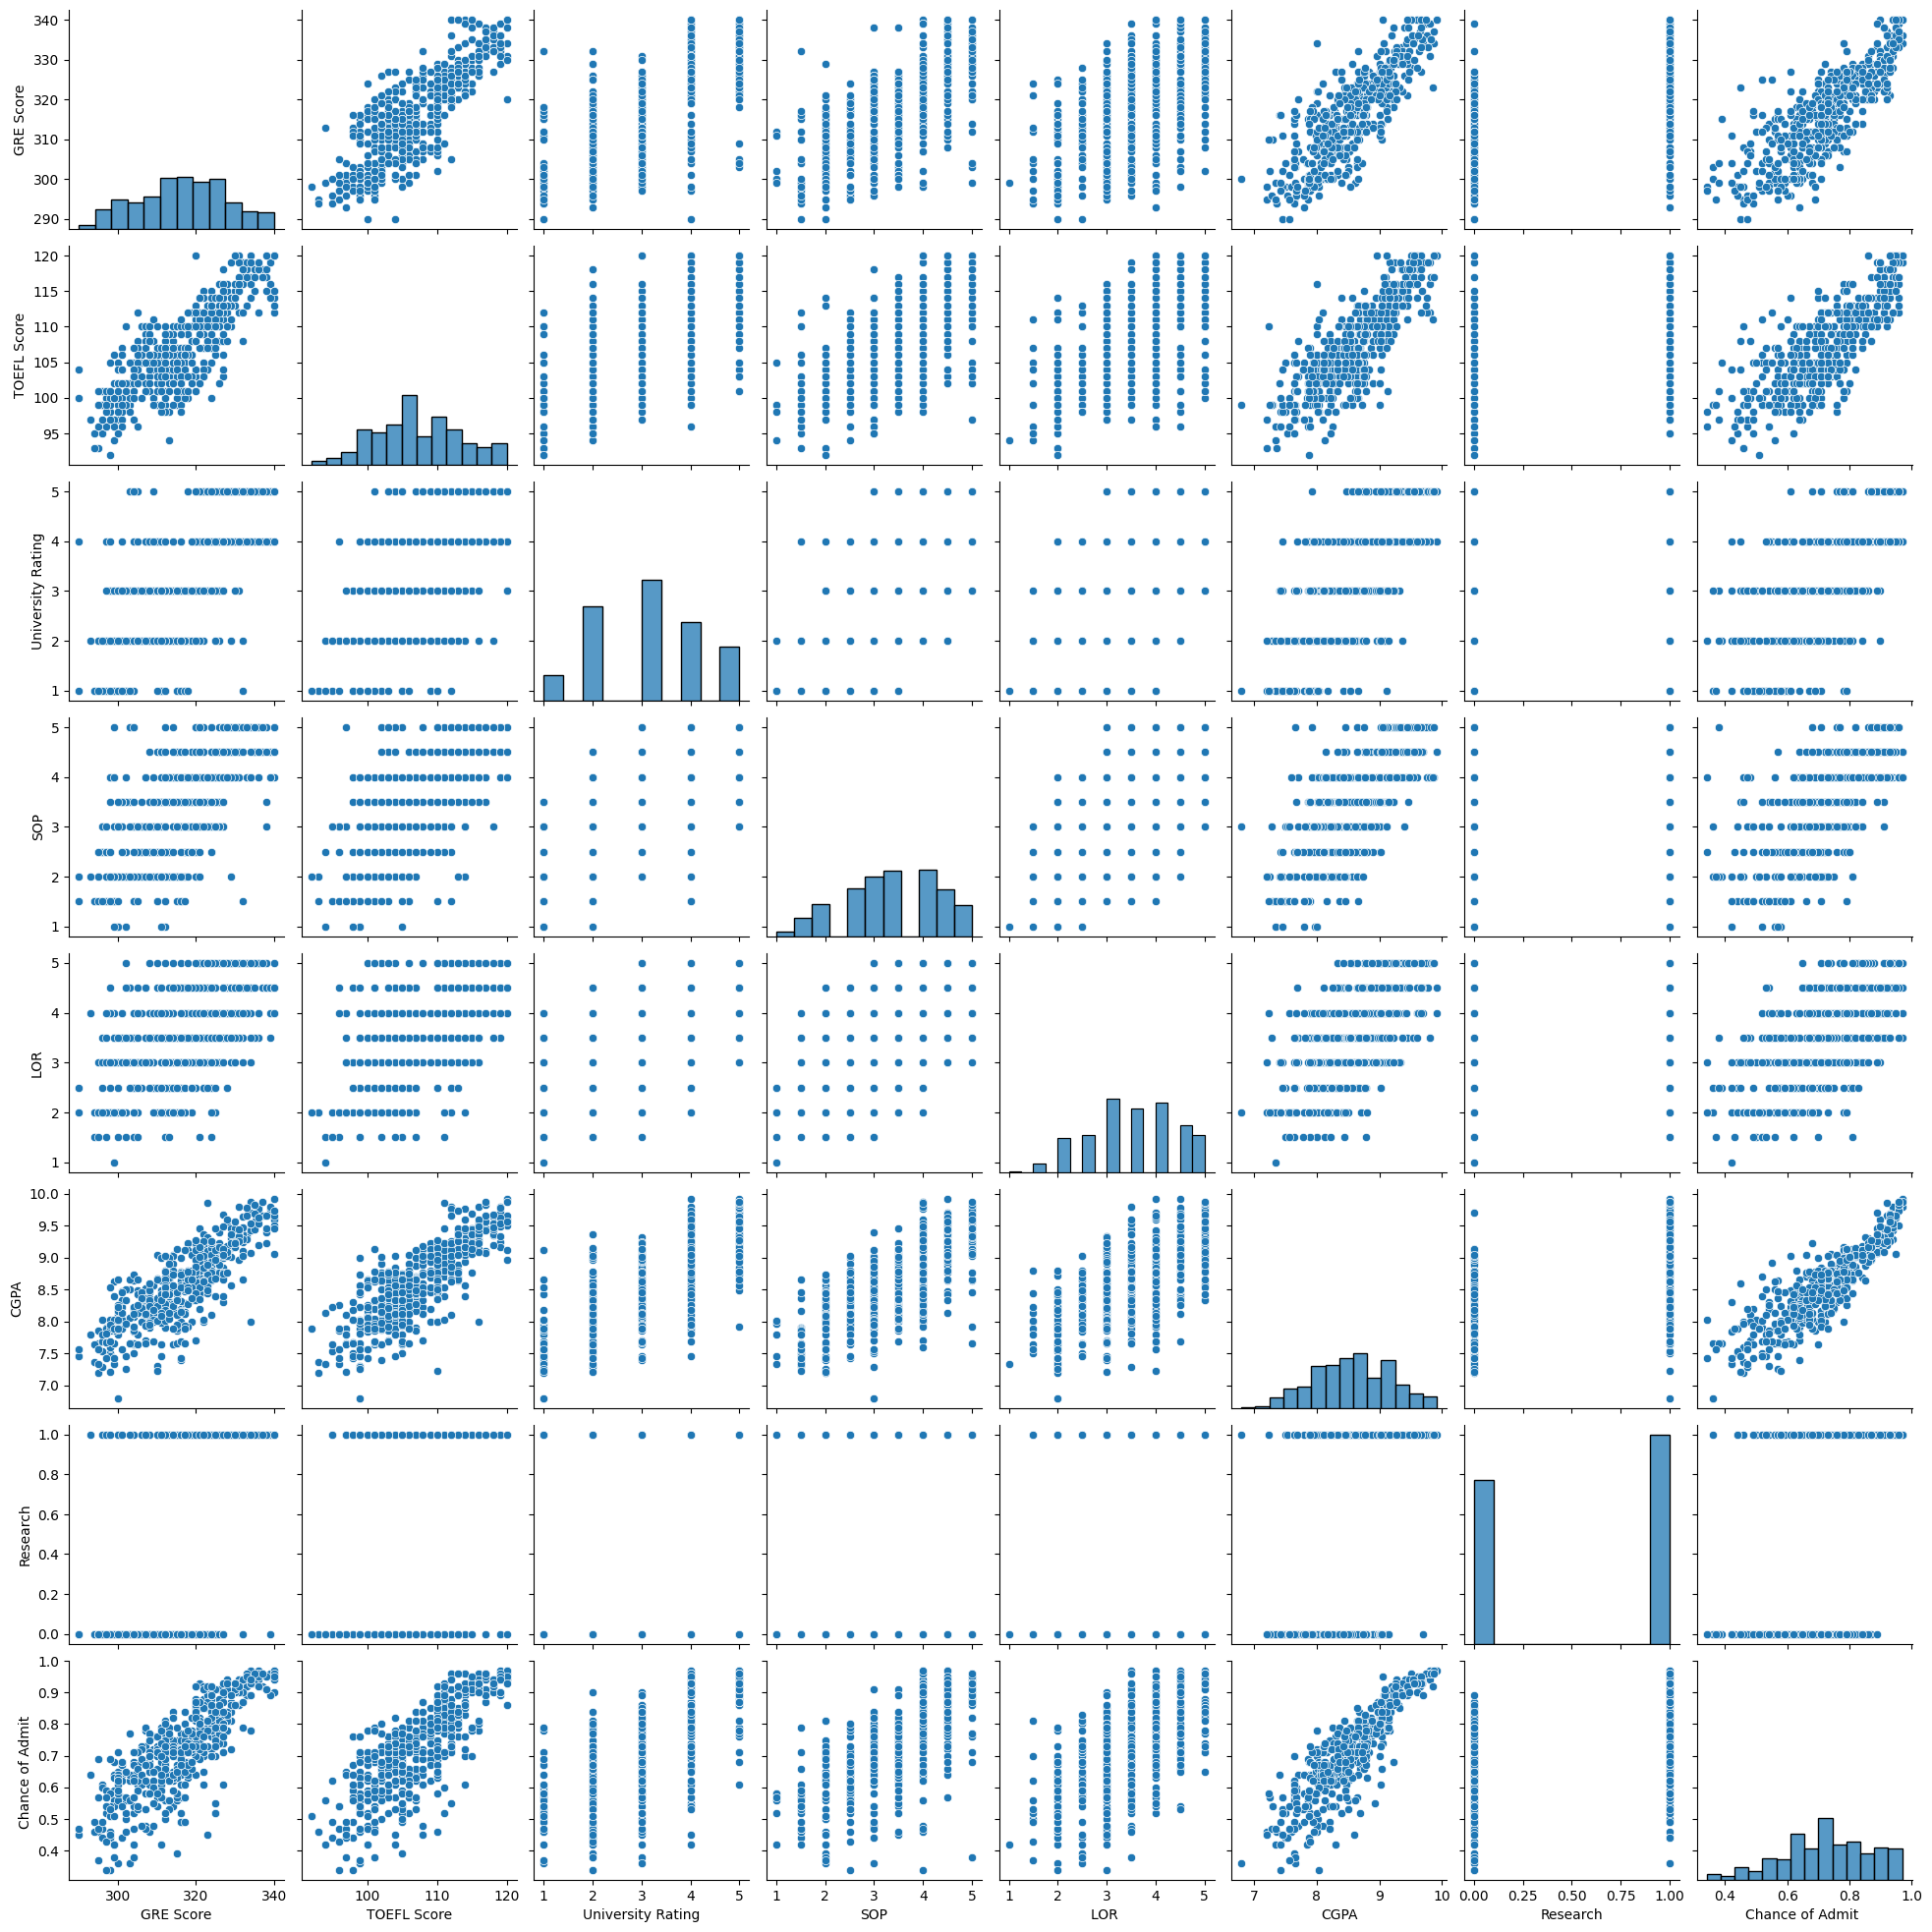

In [ ]:
sns.pairplot(data = df)

In [ ]:
df1 = df.corr()
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

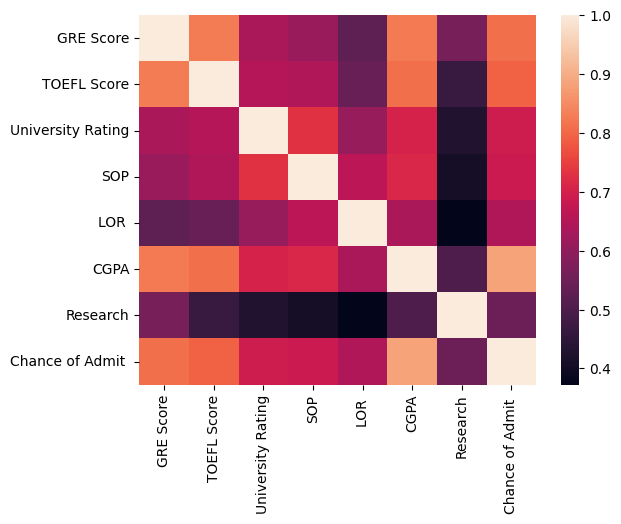

In [ ]:
sns.heatmap(data = df1)

<Axes: xlabel='Chance of Admit '>

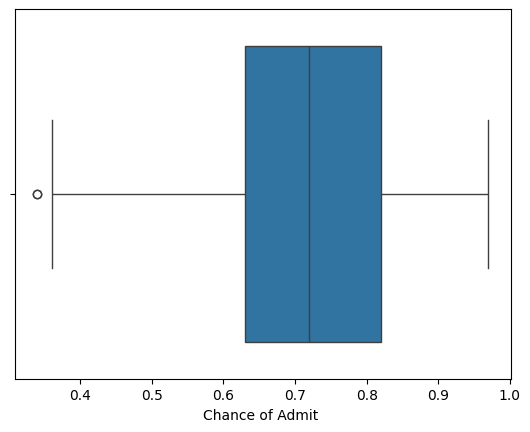

In [ ]:
# Plotting the boxplot for checking outliers
sns.boxplot(data = df,x = "Chance of Admit ")

In [ ]:
df.groupby("Research")["Chance of Admit "].agg(["min","max","count","sum"])

,min,max,count,sum
Research,,,,
0,0.34,0.89,220,139.68
1,0.36,0.97,280,221.19


1. As we can see, the minimum is not too different from those who have done research to those who haven't.
2. The rate of admission has a difference of 0.08, i.e. 8% difference in acceptance rate.
3. There is a noticable difference in admission count between those who have/haven't done research.
4. There is a huge difference in the sum total of admission chance between the two.


The mean of samples are :  [0.7112, 0.7281199999999999, 0.71084, 0.71876, 0.7243800000000001, 0.71876, 0.7200599999999999, 0.7276600000000001, 0.71448, 0.73056, 0.71838, 0.71996, 0.7224400000000001, 0.7135799999999999, 0.7202799999999999, 0.7118199999999999, 0.70798, 0.71478, 0.7235400000000001, 0.72666, 0.72816, 0.7255799999999999, 0.7231000000000001, 0.72234, 0.71708, 0.7191799999999999, 0.72454, 0.72, 0.72478, 0.71428, 0.7093799999999999, 0.7225, 0.7214400000000001, 0.7172799999999999, 0.7359600000000001, 0.7254400000000001, 0.7232, 0.7151000000000001, 0.7259200000000001, 0.7331199999999999, 0.7273000000000001, 0.7105199999999999, 0.72576, 0.72426, 0.7126, 0.7206, 0.72984, 0.7202999999999999, 0.7268, 0.7202200000000001, 0.7224400000000001, 0.72744, 0.72622, 0.72172, 0.71648, 0.72342, 0.72288, 0.7241200000000001, 0.71686, 0.72276, 0.73842, 0.72324, 0.72076, 0.7150799999999999, 0.7181200000000001, 0.72926, 0.7222000000000001, 0.7132999999999999, 0.7252, 0.7195199999999999, 0.7218, 0.7

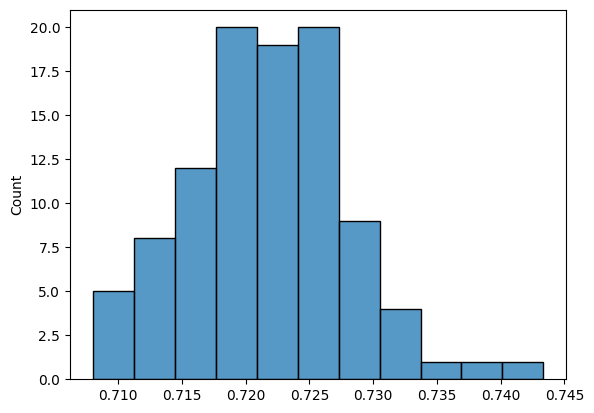

In [ ]:
sample_size = 500
number_of_samples = 100
sample_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  samples = np.random.choice(df["Chance of Admit "],size = sample_size)
  samples_mean = np.mean(samples)
  sample_survey.append(samples_mean)

print("The mean of samples are : ",sample_survey)
sns.histplot(sample_survey)
print("The mean of averages of samples are : ", np.mean(sample_survey))

We can see that the sample size of 500 gives a normal/gaussian distribution.
We can see the mean of admission chances is approximately 722.5.


In [ ]:
lower_limit_95 = np.percentile(sample_survey,5)
upper_limit_95 = np.percentile(sample_survey, 95)

lower_limit_97= np.percentile(sample_survey,2.5)
upper_limit_97 = np.percentile(sample_survey, 97.5)

lower_limit_99 = np.percentile(sample_survey,0.5)
upper_limit_99 = np.percentile(sample_survey, 99.5)

print("The 95% confidence interval is : (",lower_limit_95,",",upper_limit_95,")")
print("The 97.5% confidence interval is : (",lower_limit_97,",",upper_limit_97,")")
print("The 99.5% confidence interval is : (",lower_limit_99,",",upper_limit_99,")")

The 95% confidence interval is : ( 0.7111820000000001 , 0.7318880000000001 )
The 97.5% confidence interval is : ( 0.7099214999999999 , 0.7346109999999999 )
The 99.5% confidence interval is : ( 0.708376 , 0.7409146999999999 )


In [ ]:
#differentiating on the basis of research
re_true= df.loc[df["Research"]== 1]
re_false= df.loc[df["Research"]== 0]
re_true.shape,re_false.shape

((280, 8), (220, 8))

The mean of samples are :  [0.7933571428571428, 0.7980357142857143, 0.7968928571428572, 0.7864642857142857, 0.8042142857142858, 0.79025, 0.7899999999999999, 0.7978214285714286, 0.7725000000000001, 0.7829285714285714, 0.7922142857142856, 0.7922857142857143, 0.7781785714285715, 0.79675, 0.8005714285714286, 0.7925357142857143, 0.7958214285714286, 0.7908214285714286, 0.7868214285714286, 0.78525, 0.7904642857142856, 0.7760357142857144, 0.7831071428571429, 0.8113214285714285, 0.7946428571428571, 0.7773214285714285, 0.7955714285714285, 0.7907500000000001, 0.7823928571428571, 0.7851785714285714, 0.7925714285714286, 0.7976071428571428, 0.7818214285714287, 0.78975, 0.785, 0.7869642857142858, 0.7979642857142858, 0.7835714285714286, 0.7916428571428571, 0.78575, 0.7923214285714285, 0.7846785714285714, 0.7878571428571429, 0.7943214285714285, 0.7937142857142857, 0.7823571428571429, 0.7808928571428572, 0.7813928571428571, 0.7979642857142857, 0.7968214285714286, 0.7966071428571428, 0.7731785714285715, 

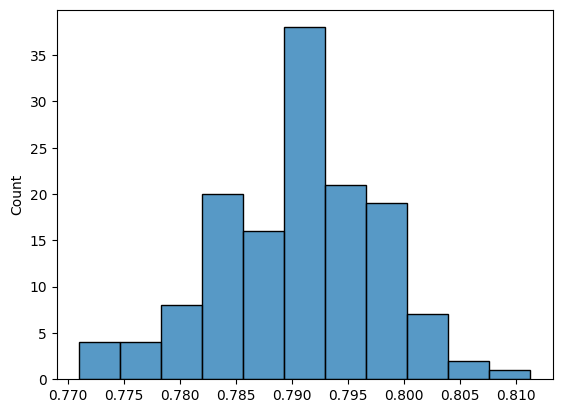

In [ ]:
sample_size = 280
number_of_samples = 140
survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  samples = np.random.choice(re_true["Chance of Admit "],size = sample_size)# selecting random values
  samples_mean = np.mean(samples) # calculating the mean of sample
  survey.append(samples_mean) # Appending the mean into the list

print("The mean of samples are : ",survey)
sns.histplot(survey)
print("The mean of averages of samples are : ", np.mean(survey))

We can see that the sample size of 280 gives a normal/gaussian distribution.
We can see the mean of admission chances is approximately 0.792.


The mean of samples are :  [0.63075, 0.6407142857142857, 0.6319999999999999, 0.631, 0.6305357142857143, 0.6355000000000001, 0.635142857142857, 0.6446428571428572, 0.6393214285714285, 0.6283571428571428, 0.6473214285714286, 0.6313214285714285, 0.6420714285714286, 0.6401428571428571, 0.6346785714285714, 0.6359642857142856, 0.6324285714285713, 0.6397142857142857, 0.6413214285714286, 0.6386785714285713, 0.6329285714285715, 0.6243214285714286, 0.6386785714285713, 0.6221785714285714, 0.6351785714285715, 0.6424642857142858, 0.6358214285714284, 0.6416428571428571, 0.642357142857143, 0.6302142857142856, 0.643357142857143, 0.63225, 0.6307857142857143, 0.6293928571428572, 0.6321071428571429, 0.6373571428571428, 0.6315357142857142, 0.6333571428571427, 0.6437857142857143, 0.6495357142857143, 0.6347142857142858, 0.6388571428571428, 0.64525, 0.6361428571428571, 0.627, 0.633, 0.6432142857142858, 0.6272857142857142, 0.6324642857142857, 0.6357142857142857, 0.6385357142857142, 0.6345357142857143, 0.63735

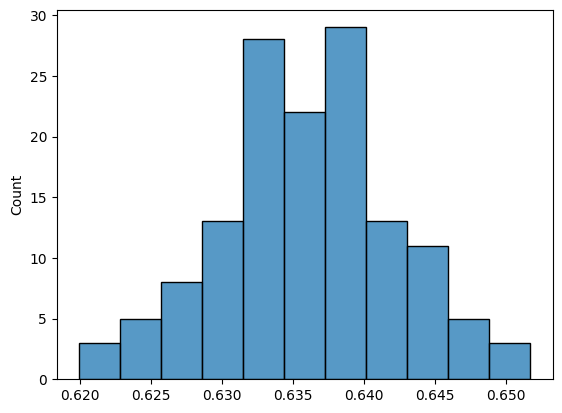

In [ ]:
sample_size = 280
number_of_samples = 140
survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  samples = np.random.choice(re_false["Chance of Admit "],size = sample_size)# selecting random values
  samples_mean = np.mean(samples) # calculating the mean of sample
  survey.append(samples_mean) # Appending the mean into the list

print("The mean of samples are : ",survey)
sns.histplot(survey)
print("The mean of averages of samples are : ", np.mean(survey))

We can see that the sample size of 280 gives a normal/gaussian distribution.
We can see the mean of admission chances is approximately 0.6375.


In [ ]:
#differentiating on the basis of research
ur_1= df.loc[df["University Rating"]== 1]
ur_2= df.loc[df["University Rating"]== 2]
ur_3= df.loc[df["University Rating"]== 3]
ur_4= df.loc[df["University Rating"]== 4]
ur_5= df.loc[df["University Rating"]== 5]
ur_1.shape,ur_2.shape,ur_3.shape,ur_4.shape,ur_5.shape

((34, 8), (126, 8), (162, 8), (105, 8), (73, 8))

The mean of samples are :  [0.5611470588235294, 0.559, 0.5669117647058823, 0.5620882352941176, 0.568529411764706, 0.5518823529411765, 0.5599411764705883, 0.5624411764705883, 0.5569117647058823, 0.5629705882352942, 0.5563235294117648, 0.565764705882353, 0.5669411764705882, 0.5744705882352941, 0.5676470588235294, 0.5689117647058823, 0.5640294117647059, 0.5524705882352942, 0.5615, 0.564, 0.5568823529411765, 0.5601470588235293, 0.5562941176470588, 0.5625294117647058, 0.5633529411764706, 0.563764705882353, 0.5603235294117647, 0.545235294117647, 0.5691470588235293, 0.5585294117647058, 0.5658823529411765, 0.5685, 0.5619411764705883, 0.5661176470588236, 0.5622058823529412, 0.5622058823529412, 0.5569705882352941, 0.5587352941176471, 0.5597941176470588, 0.5641764705882354, 0.5619999999999999, 0.5588529411764706, 0.5728529411764706, 0.5645, 0.5621176470588235, 0.5623529411764705, 0.5678235294117647, 0.5602058823529412, 0.5595588235294118, 0.5668529411764706, 0.5657941176470589, 0.5587647058823529

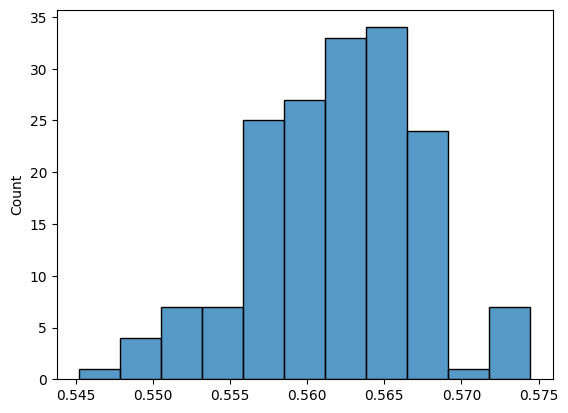

In [ ]:
sample_size = 340
number_of_samples = 170
ur1_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  samples = np.random.choice(ur_1["Chance of Admit "],size = sample_size)# selecting random values
  samples_mean = np.mean(samples) # calculating the mean of sample
  ur1_survey.append(samples_mean) # Appending the mean into the list

print("The mean of samples are : ",ur1_survey)
sns.histplot(ur1_survey)
print("The mean of averages of samples are : ", np.mean(ur1_survey))

We can see that the sample size of 340 gives a normal/gaussian distribution.
We can see the mean of admission chances is approximately 0.564.

The mean of samples are :  [0.6239047619047619, 0.6245634920634922, 0.626484126984127, 0.6312222222222222, 0.6301587301587301, 0.6250238095238095, 0.6289523809523809, 0.625047619047619, 0.6249761904761905, 0.6312301587301586, 0.6228968253968253, 0.6248571428571428, 0.6254841269841269, 0.6256666666666666, 0.6225396825396826, 0.6278015873015873, 0.6274206349206349, 0.6204682539682539, 0.6256111111111111, 0.6205555555555554, 0.6255396825396825, 0.6250714285714285, 0.6289444444444444, 0.6214047619047619, 0.6283571428571428, 0.6240793650793651, 0.6266746031746032, 0.6298492063492063, 0.6266746031746032, 0.6233333333333333, 0.6241746031746032, 0.6255714285714286, 0.6213888888888889, 0.6274285714285713, 0.6232698412698412, 0.6280714285714285, 0.6252301587301587, 0.6247063492063492, 0.6247857142857142, 0.6299126984126985, 0.6242380952380953, 0.6208730158730158, 0.6263253968253968, 0.6247619047619049, 0.6265, 0.6280476190476191, 0.6275000000000001, 0.6282777777777778, 0.6245, 0.624531746031746,

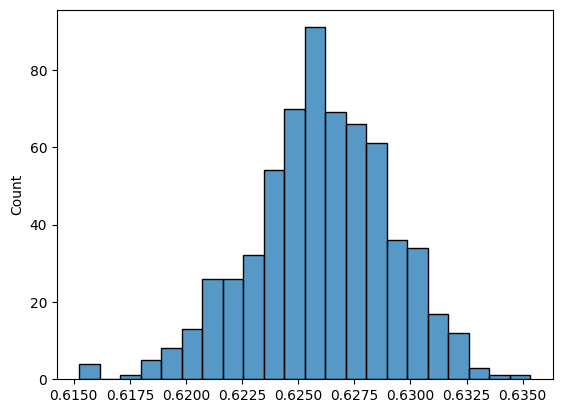

In [ ]:
sample_size = 1260
number_of_samples = 630
ur2_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  samples = np.random.choice(ur_2["Chance of Admit "],size = sample_size)# selecting random values
  samples_mean = np.mean(samples) # calculating the mean of sample
  ur2_survey.append(samples_mean) # Appending the mean into the list

print("The mean of samples are : ",ur2_survey)
sns.histplot(ur2_survey)
print("The mean of averages of samples are : ", np.mean(ur2_survey))

We can see that the sample size of 1260 gives a normal/gaussian distribution.
We can see the mean of admission chances is approximately 0.6262.

The mean of samples are :  [0.707716049382716, 0.7011296296296298, 0.7002962962962963, 0.7036604938271603, 0.7018333333333333, 0.7045802469135803, 0.7032037037037038, 0.7038333333333333, 0.7050987654320987, 0.7032469135802467, 0.7014197530864197, 0.7043086419753086, 0.7038395061728395, 0.7034382716049382, 0.7056049382716049, 0.7052469135802469, 0.7039320987654321, 0.7057962962962963, 0.7017777777777778, 0.7040617283950616, 0.7008641975308643, 0.700253086419753, 0.7040617283950616, 0.7029444444444445, 0.7049012345679012, 0.7007283950617283, 0.7013148148148148, 0.7042469135802469, 0.7061296296296296, 0.699679012345679, 0.7016975308641975, 0.6983209876543209, 0.704425925925926, 0.7065308641975309, 0.7014691358024692, 0.7065185185185184, 0.7037345679012347, 0.7026296296296297, 0.7097839506172839, 0.7055987654320989, 0.7012222222222222, 0.7045, 0.7020246913580247, 0.7047283950617284, 0.7068827160493827, 0.7020555555555555, 0.7042283950617285, 0.7010802469135803, 0.7024382716049383, 0.701895

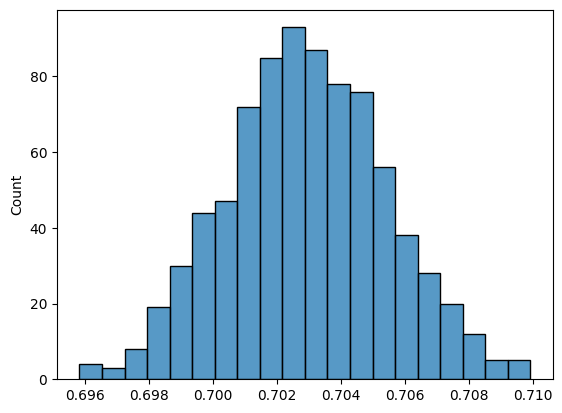

In [ ]:
sample_size = 1620
number_of_samples = 810
ur3_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  samples = np.random.choice(ur_3["Chance of Admit "],size = sample_size)# selecting random values
  samples_mean = np.mean(samples) # calculating the mean of sample
  ur3_survey.append(samples_mean) # Appending the mean into the list

print("The mean of samples are : ",ur3_survey)
sns.histplot(ur3_survey)
print("The mean of averages of samples are : ", np.mean(ur3_survey))

We can see that the sample size of 1620 gives a normal/gaussian distribution.
We can see the mean of admission chances is approximately 0.7025.

The mean of samples are :  [0.804447619047619, 0.8077428571428571, 0.8098095238095238, 0.8068095238095239, 0.8075238095238096, 0.8015619047619047, 0.8060095238095237, 0.8001142857142856, 0.8040952380952382, 0.8044761904761906, 0.8044571428571428, 0.7983714285714285, 0.7960380952380953, 0.8018952380952381, 0.8079619047619048, 0.8023714285714286, 0.8007333333333333, 0.7940571428571428, 0.7998, 0.8058857142857143, 0.7984571428571429, 0.8012666666666666, 0.7978000000000001, 0.7970761904761904, 0.8032571428571429, 0.7978285714285713, 0.8008761904761904, 0.800447619047619, 0.8036666666666666, 0.8032857142857144, 0.8015714285714287, 0.8086285714285715, 0.8029999999999999, 0.7983999999999999, 0.8056095238095238, 0.800247619047619, 0.8074095238095238, 0.8044761904761906, 0.8016666666666666, 0.7994190476190476, 0.7934857142857143, 0.8024190476190476, 0.803847619047619, 0.8040761904761905, 0.8029619047619048, 0.8096761904761903, 0.8015047619047619, 0.8061047619047619, 0.8053619047619047, 0.800838

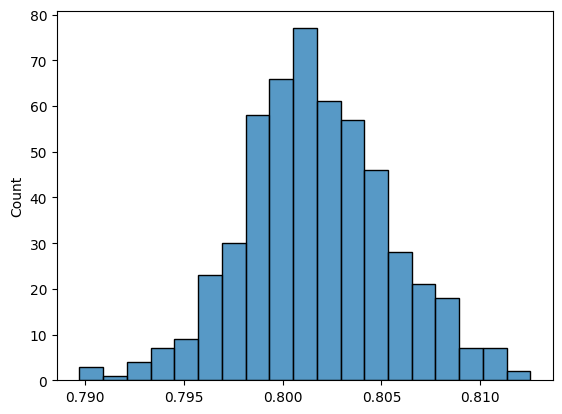

In [ ]:
sample_size = 1050
number_of_samples = 525
ur4_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  samples = np.random.choice(ur_4["Chance of Admit "],size = sample_size)# selecting random values
  samples_mean = np.mean(samples) # calculating the mean of sample
  ur4_survey.append(samples_mean) # Appending the mean into the list

print("The mean of samples are : ",ur4_survey)
sns.histplot(ur4_survey)
print("The mean of averages of samples are : ", np.mean(ur4_survey))

We can see that the sample size of 1050 gives a normal/gaussian distribution.
We can see the mean of admission chances is approximately 0.801.

The mean of samples are :  [0.8864931506849313, 0.8843013698630137, 0.891027397260274, 0.8875753424657533, 0.8901917808219177, 0.889027397260274, 0.8913424657534246, 0.8921369863013698, 0.8887123287671232, 0.8885068493150684, 0.8886438356164384, 0.8861232876712328, 0.8860684931506848, 0.8844520547945204, 0.8843424657534246, 0.8875479452054794, 0.8846438356164383, 0.8854657534246575, 0.8817260273972602, 0.8854109589041095, 0.8855205479452054, 0.8870958904109588, 0.8888356164383562, 0.8913561643835617, 0.8852328767123288, 0.890041095890411, 0.8873972602739726, 0.8928082191780822, 0.8881506849315068, 0.8910136986301369, 0.8926438356164382, 0.8895890410958902, 0.8910000000000001, 0.8827397260273973, 0.8926849315068492, 0.8877260273972603, 0.8890410958904109, 0.8836164383561643, 0.8904794520547945, 0.8889589041095891, 0.8867534246575342, 0.8866027397260273, 0.8945753424657533, 0.8862465753424658, 0.8894794520547944, 0.8881643835616437, 0.8907123287671234, 0.8863972602739725, 0.8848493150684

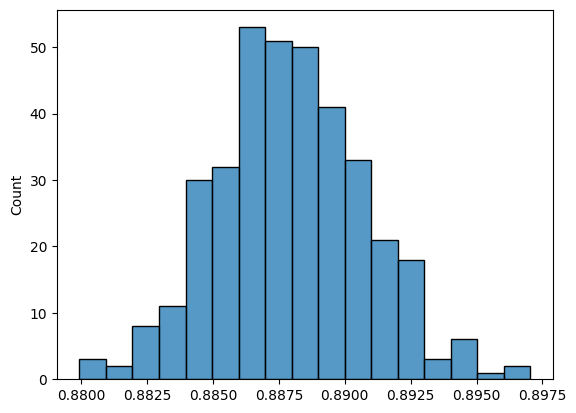

In [ ]:
sample_size = 730
number_of_samples = 365
ur5_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  samples = np.random.choice(ur_5["Chance of Admit "],size = sample_size)# selecting random values
  samples_mean = np.mean(samples) # calculating the mean of sample
  ur5_survey.append(samples_mean) # Appending the mean into the list

print("The mean of samples are : ",ur5_survey)
sns.histplot(ur5_survey)
print("The mean of averages of samples are : ", np.mean(ur5_survey))

We can see that the sample size of 730 gives a normal/gaussian distribution.
We can see the mean of admission chances is approximately 0.887.

In [ ]:
#  CONFIDENCE INTERVAL FOR university with rating 1(95%, 97.5%, 99.5%)
lower_limit_95 = np.percentile(ur1_survey,5)
upper_limit_95 = np.percentile(ur1_survey, 95)

lower_limit_97 = np.percentile(ur1_survey,2.5)
upper_limit_97 = np.percentile(ur1_survey, 97.5)

lower_limit_99 = np.percentile(ur1_survey,0.5)
upper_limit_99 = np.percentile(ur1_survey, 99.5)

print("The 95% confidence interval is : (",lower_limit_95,upper_limit_95,")")
print("The 97.5% confidence interval is : (",lower_limit_97,upper_limit_97,")")
print("The 99.5% confidence interval is : (",lower_limit_99,upper_limit_99,")")

The 95% confidence interval is : ( 0.552039705882353 0.5690411764705882 )
The 97.5% confidence interval is : ( 0.5503492647058823 0.5730124999999999 )
The 99.5% confidence interval is : ( 0.5476708823529413 0.5738741176470589 )


In [ ]:
#  CONFIDENCE INTERVAL FOR university with rating 2(95%, 97.5%, 99.5%)
lower_limit_95 = np.percentile(ur2_survey,5)
upper_limit_95 = np.percentile(ur2_survey, 95)

lower_limit_97 = np.percentile(ur2_survey,2.5)
upper_limit_97 = np.percentile(ur2_survey, 97.5)

lower_limit_99 = np.percentile(ur2_survey,0.5)
upper_limit_99 = np.percentile(ur2_survey, 99.5)

print("The 95% confidence interval is : (",lower_limit_95,upper_limit_95,")")
print("The 97.5% confidence interval is : (",lower_limit_97,upper_limit_97,")")
print("The 99.5% confidence interval is : (",lower_limit_99,upper_limit_99,")")

The 95% confidence interval is : ( 0.6208162698412698 0.6309130952380952 )
The 97.5% confidence interval is : ( 0.6196125 0.6317166666666667 )
The 99.5% confidence interval is : ( 0.6162422619047618 0.6328727777777778 )


In [ ]:
#  CONFIDENCE INTERVAL FOR university with rating 3(95%, 97.5%, 99.5%)
lower_limit_95 = np.percentile(ur3_survey,5)
upper_limit_95 = np.percentile(ur3_survey, 95)

lower_limit_97 = np.percentile(ur3_survey,2.5)
upper_limit_97 = np.percentile(ur3_survey, 97.5)

lower_limit_99 = np.percentile(ur3_survey,0.5)
upper_limit_99 = np.percentile(ur3_survey, 99.5)

print("The 95% confidence interval is : (",lower_limit_95,upper_limit_95,")")
print("The 97.5% confidence interval is : (",lower_limit_97,upper_limit_97,")")
print("The 99.5% confidence interval is : (",lower_limit_99,upper_limit_99,")")

The 95% confidence interval is : ( 0.6988910493827161 0.7071302469135802 )
The 97.5% confidence interval is : ( 0.698105864197531 0.7079217592592594 )
The 99.5% confidence interval is : ( 0.696710987654321 0.7092091666666668 )


In [ ]:
#  CONFIDENCE INTERVAL FOR university with rating 4(95%, 97.5%, 99.5%)
lower_limit_95 = np.percentile(ur4_survey,5)
upper_limit_95 = np.percentile(ur4_survey, 95)

lower_limit_97 = np.percentile(ur4_survey,2.5)
upper_limit_97 = np.percentile(ur4_survey, 97.5)

lower_limit_99 = np.percentile(ur4_survey,0.5)
upper_limit_99 = np.percentile(ur4_survey, 99.5)

print("The 95% confidence interval is : (",lower_limit_95,upper_limit_95,")")
print("The 97.5% confidence interval is : (",lower_limit_97,upper_limit_97,")")
print("The 99.5% confidence interval is : (",lower_limit_99,upper_limit_99,")")

The 95% confidence interval is : ( 0.7959352380952381 0.8080857142857142 )
The 97.5% confidence interval is : ( 0.7940619047619047 0.8092266666666668 )
The 99.5% confidence interval is : ( 0.7910283809523809 0.8110708571428572 )


In [ ]:
#  CONFIDENCE INTERVAL FOR university with rating 5(95%, 97.5%, 99.5%)
lower_limit_95 = np.percentile(ur5_survey,5)
upper_limit_95 = np.percentile(ur5_survey, 95)

lower_limit_97 = np.percentile(ur5_survey,2.5)
upper_limit_97 = np.percentile(ur5_survey, 97.5)

lower_limit_99 = np.percentile(ur5_survey,0.5)
upper_limit_99 = np.percentile(ur5_survey, 99.5)

print("The 95% confidence interval is : (",lower_limit_95,upper_limit_95,")")
print("The 97.5% confidence interval is : (",lower_limit_97,upper_limit_97,")")
print("The 99.5% confidence interval is : (",lower_limit_99,upper_limit_99,")")

The 95% confidence interval is : ( 0.8836164383561643 0.8926328767123286 )
The 97.5% confidence interval is : ( 0.8827534246575343 0.8936986301369862 )
The 99.5% confidence interval is : ( 0.8808386301369863 0.895704383561644 )


In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,0.841270
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,0.984127
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,0.936508
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,0.619048


In [ ]:
y=df1['Chance of Admit ']
x=df1.drop('Chance of Admit ',axis=1)
y.shape, x.shape

((500,), (500, 7))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8300766064752694

In [ ]:
x_pred=model.predict(x_train)
y_pred=model.predict(x_test)
x_pred,y_pred

(array([0.25910572, 0.76974991, 0.98911123, 0.50784282, 0.53849106,
        0.72727658, 0.44678876, 0.75845709, 0.29795751, 0.96537613,
        0.50322751, 0.99230229, 0.702859  , 0.47764739, 0.60155031,
        0.85074775, 0.50995747, 0.77951609, 0.59958673, 0.41497075,
        0.4234378 , 0.64940326, 0.73978131, 0.26986897, 0.41714091,
        0.52819931, 0.66992677, 0.61110881, 0.23680616, 0.43414324,
        0.46458278, 0.66756311, 0.40760954, 0.65409307, 0.91957004,
        0.32255533, 0.45248834, 0.56618736, 0.2285012 , 0.55747944,
        0.71737982, 0.62792175, 0.48611204, 0.74441781, 0.39642919,
        0.45500902, 0.57519179, 0.36869075, 0.71601324, 0.44333993,
        0.87869486, 0.81008056, 0.62934617, 0.76632724, 0.35075734,
        0.38053035, 0.30823593, 0.42393729, 0.2078023 , 0.55919752,
        0.73169661, 0.64496827, 0.35915568, 0.80500998, 0.27210578,
        0.67982086, 0.86437249, 0.73986702, 0.71725124, 0.56148388,
        0.62262346, 0.63691728, 0.66953913, 0.61

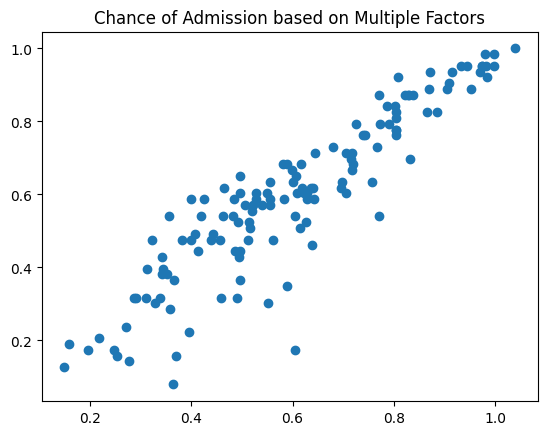

In [ ]:
fig=plt.figure()
plt.scatter(y_pred,y_test)
plt.title("Chance of Admission based on Multiple Factors")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.27,random_state=1)
from sklearn.linear_model import Lasso
model1=Lasso(alpha=0.1)
model1.fit(x1_train,y1_train)
print(model1.score(x1_test,y1_test))
x1_pred=model1.predict(x1_train)
y1_pred=model1.predict(x1_test)

-0.002801601380672203


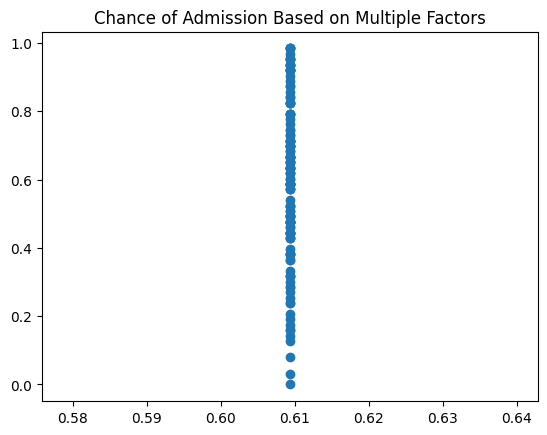

In [ ]:
fig=plt.figure()
plt.scatter(y1_pred,y1_test)
plt.title("Chance of Admission Based on Multiple Factors")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.27,random_state=1)
from sklearn.linear_model import Ridge
model2=Ridge(alpha=0.1)
model2.fit(x2_train,y2_train)
print(model2.score(x2_test,y2_test))
x2_pred=model2.predict(x2_train)
y2_pred=model2.predict(x2_test)

0.8223504909854972


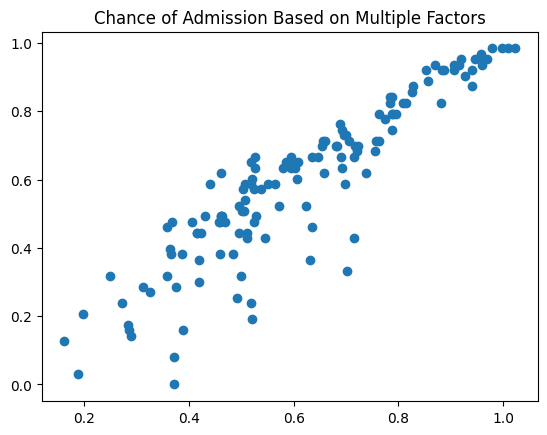

In [ ]:
fig=plt.figure()
plt.scatter(y2_pred,y2_test)
plt.title("Chance of Admission Based on Multiple Factors")
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'GRE Score'),
  Text(1, 0, 'TOEFL Score'),
  Text(2, 0, 'University Rating'),
  Text(3, 0, 'SOP'),
  Text(4, 0, 'LOR '),
  Text(5, 0, 'CGPA'),
  Text(6, 0, 'Research')])

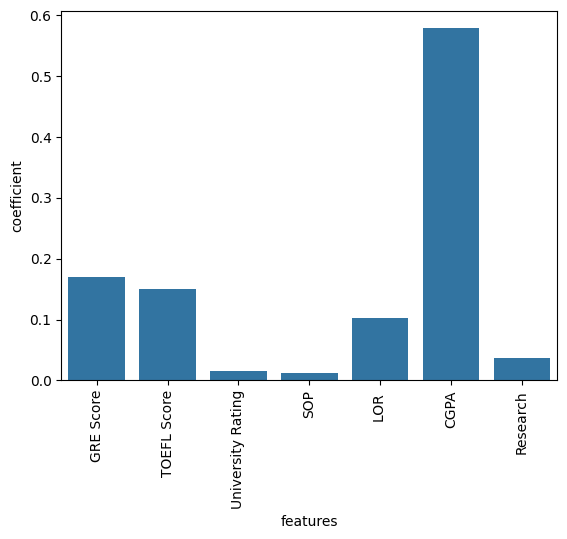

In [ ]:
import seaborn as sns
imp=pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))),columns=['features','coefficient'])
sns.barplot(x='features',y='coefficient',data=imp)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'GRE Score'),
  Text(1, 0, 'TOEFL Score'),
  Text(2, 0, 'University Rating'),
  Text(3, 0, 'SOP'),
  Text(4, 0, 'LOR '),
  Text(5, 0, 'CGPA'),
  Text(6, 0, 'Research')])

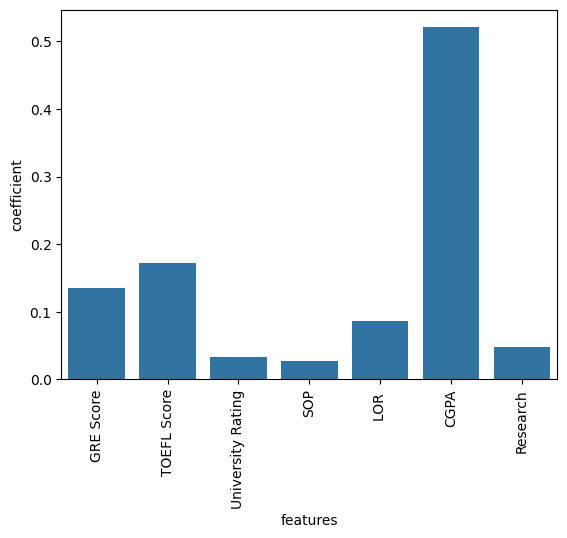

In [ ]:
import seaborn as sns
imp=pd.DataFrame(list(zip(x2_test.columns,np.abs(model2.coef_))),columns=['features','coefficient'])
sns.barplot(x='features',y='coefficient',data=imp)
plt.xticks(rotation=90)

# Comment on the distribution of variables:

1. Student with a TOEFL Score of 120 and a GRE Score of 340 and a CPGA of 9.92 had one of the highest rate of admission.
2. Student with TOEFL Score of 96 and a GRE Score of 297 and a CPGA of 0.34 had one of the lowest rate of admission.
3. Least rate of admission was 0.34. Highest rate of admission is 0.97.
4. There are approximately 280 researchees and 220 non-researchees.
5. Students with TOEFL Scores above 100 generally have higher chance of admission, i.e. proficiency in English is a critical factor for success in the admission process.
6. Students with GRE Scores of 320 and above tend to have higher admission rates, indicating that strong performance on the GRE is a key in predicting acceptance.
7. Students with CPGA scores below 5.0 usually have lower chance of admission, regardless of their TOEFL and GRE scores.
8. Outliers in the dataset, such as students with very high or very low scores in any of the three variables, indicate that while there are exceptions, the general trend supports the notion that higher scores correlate with better admission outcomes.

# Comment on each univariate and bivariate plot

1. CGPA in the range 7.8-9.25 is the most while others are quite less.
2. Highest count of SOP is 4.0 while least is 1.0.
3. Highest GRE Score: 340, Lowest GRE Score: 290
4. Highest TOEFL Score: 120, Lowest TOEFL Score: 93
5. If we assume 0 as non-researchers and 1 as researchers, then those who have done research are more inclined to have higher admission rate.
6. Letter of Recommendation has almost no correlation to Research done.


# Insights :

1.  Applicants with a chance of admit above 0.8 generally have higher scores in GRE and GPA, suggesting that these are strong predictors of admission.
2. Those with a chance of admit below 0.5 often have lower GRE scores and GPAs, indicating that these factors negatively impact their chance of admission.
3. Higher GRE scores, usually above 320, tend to correlate with a higher chance of admission, with many applicants in this range having a chance of admission above 0.75.
4. Applicants with a CGPA above 3.5 typically have a higher chance of admission, reinforcing the importance of academic performance.
5. Applicants with research experience generally show better chances of being admitted.
6. A higher score in the statement of purpose can lead to increased chances of admission, with many successful applicants scoring above 4.
7. The data may show that certain demographic or background factors contribute to a higher chance of admission such as the CGPA being the most looked at, followed by GRE Score, TOEFL Score, University Rating, SOP, LOR and then Research at last.
8. Different programs may have varying admission standards, which can affect the chance of admission across applicants.
9. Mean value of admission chance for the university rating of 1 is 56.19%.
10. Mean value of admission chance for the university rating of 2 is 62.61%.
11. Mean value of admission chance for the university rating of 3 is 70.29%.
12. Mean value of admission chance for the university rating of 4 is 80.16%.
13. Mean value of admission chance for the university rating of 5 is 88.79%.


